In [1]:
# Import PySpark
import findspark
findspark.init()
import pyspark # only run after findspark.init()

# Start a Spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Operations').getOrCreate()

# Read CSV

In [4]:
df = spark.read.csv('data/appl_stock.csv', inferSchema=True, header=True)
df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [9]:
df.show(5)

+-------------------+----------+----------+------------------+------------------+---------+------------------+
|               Date|      Open|      High|               Low|             Close|   Volume|         Adj Close|
+-------------------+----------+----------+------------------+------------------+---------+------------------+
|2010-01-04 00:00:00|213.429998|214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05 00:00:00|214.599998|215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06 00:00:00|214.379993|    215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07 00:00:00|    211.75|212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08 00:00:00|210.299994|212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
+-------------------+----------+----------+------------------+------------------+---------+------------------+
o

# Filter data using SQL query

In [10]:
df.filter("Close < 500").show()

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|               Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04 00:00:00|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05 00:00:00|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06 00:00:00|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07 00:00:00|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08 00:00:00|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|    

In [12]:
df.filter("Close < 500").select(['Open', 'Close']).show()

+------------------+------------------+
|              Open|             Close|
+------------------+------------------+
|        213.429998|        214.009998|
|        214.599998|        214.379993|
|        214.379993|        210.969995|
|            211.75|            210.58|
|        210.299994|211.98000499999998|
|212.79999700000002|210.11000299999998|
|209.18999499999998|        207.720001|
|        207.870005|        210.650002|
|210.11000299999998|            209.43|
|210.92999500000002|            205.93|
|        208.330002|        215.039995|
|        214.910006|            211.73|
|        212.079994|        208.069996|
|206.78000600000001|            197.75|
|202.51000200000001|        203.070002|
|205.95000100000001|        205.940001|
|        206.849995|        207.880005|
|        204.930004|        199.289995|
|        201.079996|        192.060003|
|192.36999699999998|        194.729998|
+------------------+------------------+
only showing top 20 rows



In [14]:
df.filter(df['Close'] < 500).select(['Open', 'Close']).show()

+------------------+------------------+
|              Open|             Close|
+------------------+------------------+
|        213.429998|        214.009998|
|        214.599998|        214.379993|
|        214.379993|        210.969995|
|            211.75|            210.58|
|        210.299994|211.98000499999998|
|212.79999700000002|210.11000299999998|
|209.18999499999998|        207.720001|
|        207.870005|        210.650002|
|210.11000299999998|            209.43|
|210.92999500000002|            205.93|
|        208.330002|        215.039995|
|        214.910006|            211.73|
|        212.079994|        208.069996|
|206.78000600000001|            197.75|
|202.51000200000001|        203.070002|
|205.95000100000001|        205.940001|
|        206.849995|        207.880005|
|        204.930004|        199.289995|
|        201.079996|        192.060003|
|192.36999699999998|        194.729998|
+------------------+------------------+
only showing top 20 rows



In [25]:
df.filter((df['Close'] < 200) | (df['Open']>200)).show()

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|               Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04 00:00:00|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05 00:00:00|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06 00:00:00|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07 00:00:00|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08 00:00:00|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|    

In [44]:
result = df.filter(df['Low'] == 197.16).collect()
result

[Row(Date=datetime.datetime(2010, 1, 22, 0, 0), Open=206.78000600000001, High=207.499996, Low=197.16, Close=197.75, Volume=220441900, Adj Close=25.620401)]

In [53]:
best_row = result[0]
best_row = best_row.asDict()
best_row

{'Date': datetime.datetime(2010, 1, 22, 0, 0),
 'Open': 206.78000600000001,
 'High': 207.499996,
 'Low': 197.16,
 'Close': 197.75,
 'Volume': 220441900,
 'Adj Close': 25.620401}

In [54]:
best_row['Volume']

220441900

In [33]:
import matplotlib.pyplot as plt

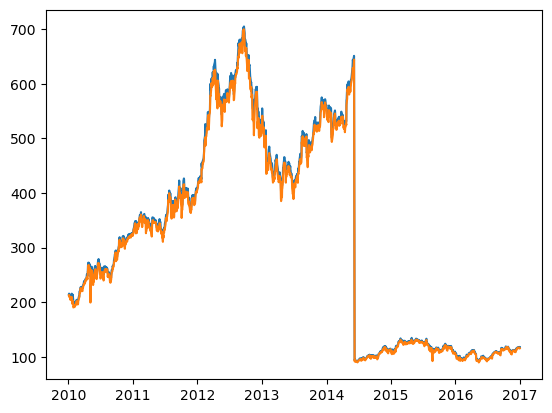

In [39]:
plt.figure()
plt.plot(df.select('Date').collect(), df.select('High').collect())
plt.plot(df.select('Date').collect(), df.select('Low').collect())